##**Глубокое обучение и нейронные сети.**


---


Заболеваемость и смертность от сердечно-сосудистых заболеваний (ССЗ) продолжает расти во всем мире на протяжении последних нескольких десятилетий. Машинное обучение дает возможность повысить точность прогнозирования рисков сердечно-сосудистых заболеваний.


Выбранный датасет содержит 600 000 записей в обучающем наборе и 400 000 в тестовом. Каждая запись содержит id пациента и 13 признаков:
1.	Age (возраст);
2.	Sex (пол);
3.	Resting_blood_pressure (артериальное давление в состоянии покоя);
4.	Serum_cholestoral (уровень холестерина в крови mg/dl);
5.	Fasting_blood_sugar (анализ глюкозы в крови натощак (> 120 mg/dl));
6.	Maximum_heart_rate_achieved (максимальная частота сердечных сокращений);
7.	Exercise_induced_angina (стенокардия при нагрузке),
8.	Oldpeak (депрессия ST-сегмента);
9.	Slope (наклон пикового сегмента ST при физической нагрузке);
10.	Number_of_major_vessels (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии);
11.	Resting_electrocardiographic_results (результаты электрокардиографических исследований в покое 0, 1, 2);
12.	Thal (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);
13.	Chest_bin (боль в груди от 1 до 4).


Сердечно-сосудистые заболевания — ведущая причина смертности, и авторы статьи ставят задачу создать модель искусственного интеллекта, способную заранее выявлять риск ССЗ . Для экспериментов используется открытый набор UCI Heart Disease: 303-304 наблюдений, 14 клинических признаков и бинарная целевая переменная — наличие болезни . Все вычисления выполняются в экосистеме Python с применением Pandas, NumPy, Matplotlib и Scikit-learn . Авторы описывают последовательность этапов — от сбора базы до логистической регрессии и оценки значимости признаков . Таким образом задаётся полный прикладной контекст для построения прогностической системы.

На шаге предобработки числовые показатели нормализуются, а категориальные колонки разворачиваются в one-hot-векторы . Затем обучается портфель классических алгоритмов: Logistic Regression, Decision Tree, SVM, K-Nearest Neighbors и Random Forest . Особое внимание уделяется Random Forest, который формирует ансамбль деревьев на случайных подпространствах признаков, что снижает переобучение. Качество моделей проверяют по accuracy, precision, recall, F-measure и анализу матриц ошибок. Для Random Forest на тренировочных данных зафиксирована точность около 0,82 .

При финальном сравнении KNN достигает ≈ 87 % accuracy, Random Forest — ≈ 83 %, Logistic Regression — ≈ 81–82 % . Авторы подчёркивают, что именно Random Forest обеспечивает оптимальный баланс качества и устойчивости, оставаясь интерпретируемым и нечувствительным к шуму . Разработанная система позиционируется как удобный инструмент поддержки клинических решений. Ограничениями названы малый объём и однородность выборки, а также отсутствие динамических показателей пациента . В качестве будущих шагов предлагаются аудит качества данных и обучение медперсонала работе с ML-моделями .

### **1. Импорты**

In [1]:
"""
Импорт библиотек для анализа данных, машинного обучения и построения нейронной сети.
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from keras import layers, models

### **2. Загрузка и первичный осмотр данных**

 Train shape: (600000, 15), Test shape: (400000, 14)

 Пример данных:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0



 Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,299999.500000,54.426085,0.677447,3.170247,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,173205.225094,9.086041,0.467454,0.949618,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,0.000000,26.061695,0.000000,-0.538498,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,149999.750000,48.078493,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,299999.500000,55.133425,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,449999.250000,60.663775,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,599999.000000,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000



 Уникальные значения в 'sex': [0 1]

 Уникальные значения в 'thal': [3 7 6]

 Уникальные значения в 'chest': [4.       1.741596 1.954609 ... 1.680331 1.949117 1.295676]

 Распределение целевой переменной 'class':
class
0    333489
1    266511
Name: count, dtype: int64


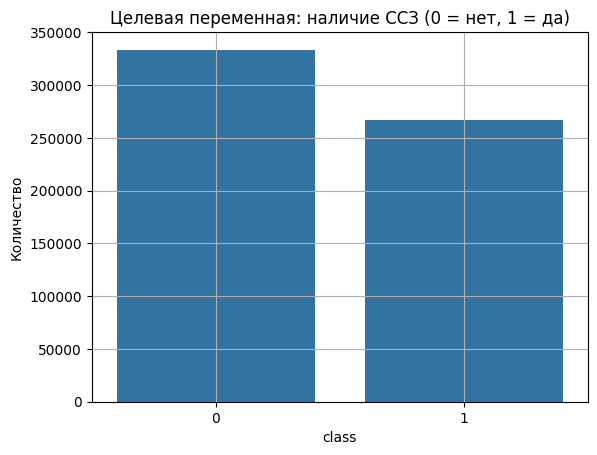

In [2]:
def load_data(train_path: str, test_path: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Загружает тренировочные и тестовые CSV-файлы.

    :param train_path: Путь до файла train.csv
    :param test_path: Путь до файла test.csv
    :return: Кортеж с двумя датафреймами: (train, test)
    """
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    return train_df, test_df


# Загрузка данных
train, test = load_data('train.csv', 'test.csv')

# Размерность таблиц
print(f" Train shape: {train.shape}, Test shape: {test.shape}")

# Первые строки
print("\n Пример данных:")
display(train.head())

# Структура таблицы
print("\n Общая информация:")
train.info()

# Пропущенные значения
print("\n Кол-во пропущенных значений по столбцам:")
print(train.isnull().sum())

# Описательная статистика
print("\n Статистика по числовым признакам:")
display(train.describe())

# Уникальные значения категориальных переменных
cat_cols = ['sex', 'thal', 'chest']
for col in cat_cols:
    unique_vals = train[col].unique()
    print(f"\n Уникальные значения в '{col}': {unique_vals}")

# Распределение целевой переменной
print("\n Распределение целевой переменной 'class':")
print(train['class'].value_counts())

sns.countplot(x='class', data=train)
plt.title('Целевая переменная: наличие ССЗ (0 = нет, 1 = да)')
plt.xlabel('class')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

Были успешно загружены тренировочный и тестовый датасеты. Размер обучающей выборки составляет 600 000 строк, тестовой — 400 000.  
Структура таблицы включает 15 признаков, целевая переменная — `class`. Пропущенные значения отсутствуют, что исключает необходимость их обработки.

Анализ категориальных признаков (`sex`, `thal`, `chest`) показал адекватное распределение.  
Также выполнено начальное исследование данных — рассчитаны основные статистики по числовым признакам.  
Целевая переменная сбалансирована умеренно, но с преобладанием класса 0 (≈ 55.6% против 44.4%).

Этот подготовило основу для последующих этапов анализа, включая визуализацию, очистку и моделирование.


###**3. Корреляционный анализ и визуализация выбросов**

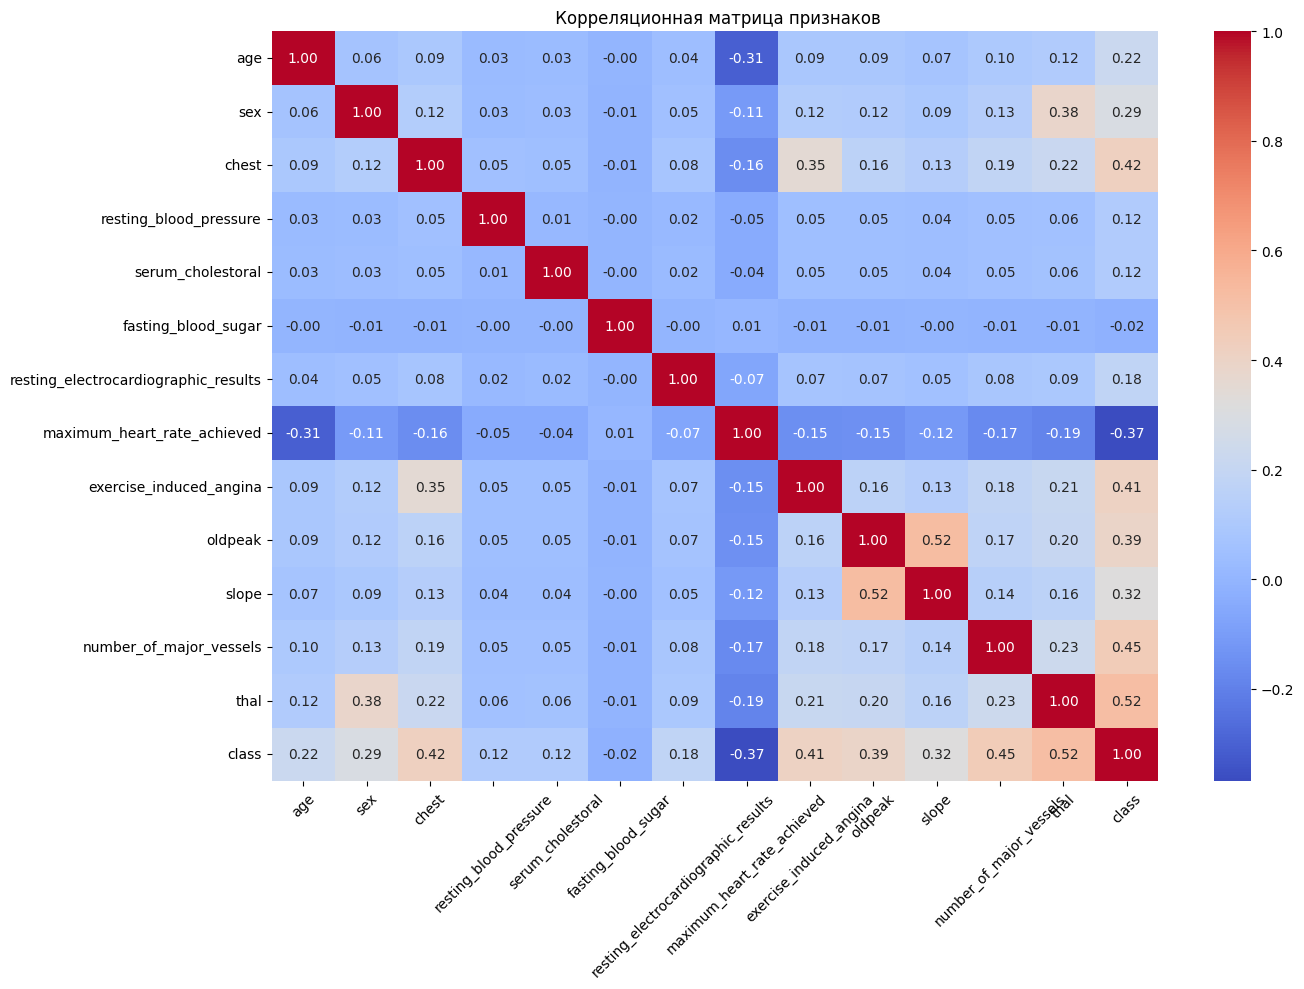

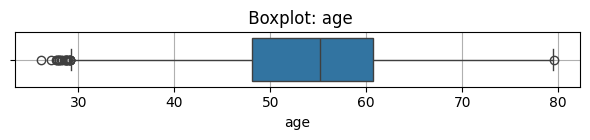

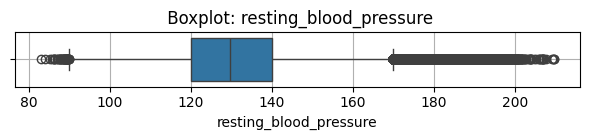

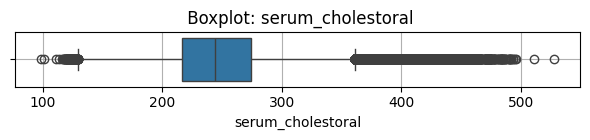

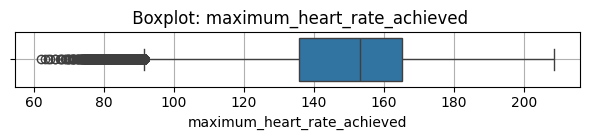

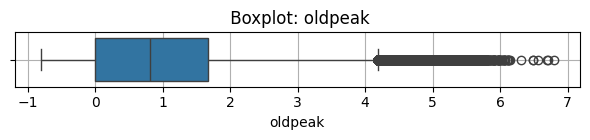

In [3]:
def plot_correlation_matrix(data: pd.DataFrame) -> None:
    """
    Строит тепловую карту корреляции между признаками.

    :param data: входной датафрейм
    """
    plt.figure(figsize=(14, 10))
    corr = data.drop(columns=['ID']).corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(' Корреляционная матрица признаков')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


def plot_outlier_distributions(data: pd.DataFrame, numeric_cols: list[str]) -> None:
    """
    Строит boxplot по каждому числовому признаку для оценки выбросов.

    :param data: датафрейм с числовыми признаками
    :param numeric_cols: список названий числовых колонок
    """
    for col in numeric_cols:
        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=data[col], orient='h')
        plt.title(f' Boxplot: {col}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# Строим тепловую карту корреляций
plot_correlation_matrix(train)

# Оцениваем выбросы
numeric_cols = [
    'age',
    'resting_blood_pressure',
    'serum_cholestoral',
    'maximum_heart_rate_achieved',
    'oldpeak'
]
plot_outlier_distributions(train, numeric_cols)

В этом разделе проведён анализ взаимосвязей между признаками с помощью тепловой карты корреляции. Выявлены значимые зависимости: переменные `chest`, `number_of_major_vessels` и `thal` показывают наибольшую корреляцию с целевой переменной `class`. Это говорит о том, что они могут иметь важное значение при построении модели.

Кроме того, при помощи boxplot-графиков были исследованы выбросы в числовых признаках. Выбросы зафиксированы в таких признаках, как `resting_blood_pressure`, `serum_cholestoral` и `oldpeak`, что стоит учесть при нормализации данных. Наличие выбросов может повлиять на стабильность и точность моделей, особенно чувствительных к масштабу данных.


**1. Гистограммы распределения всех числовых признаков**

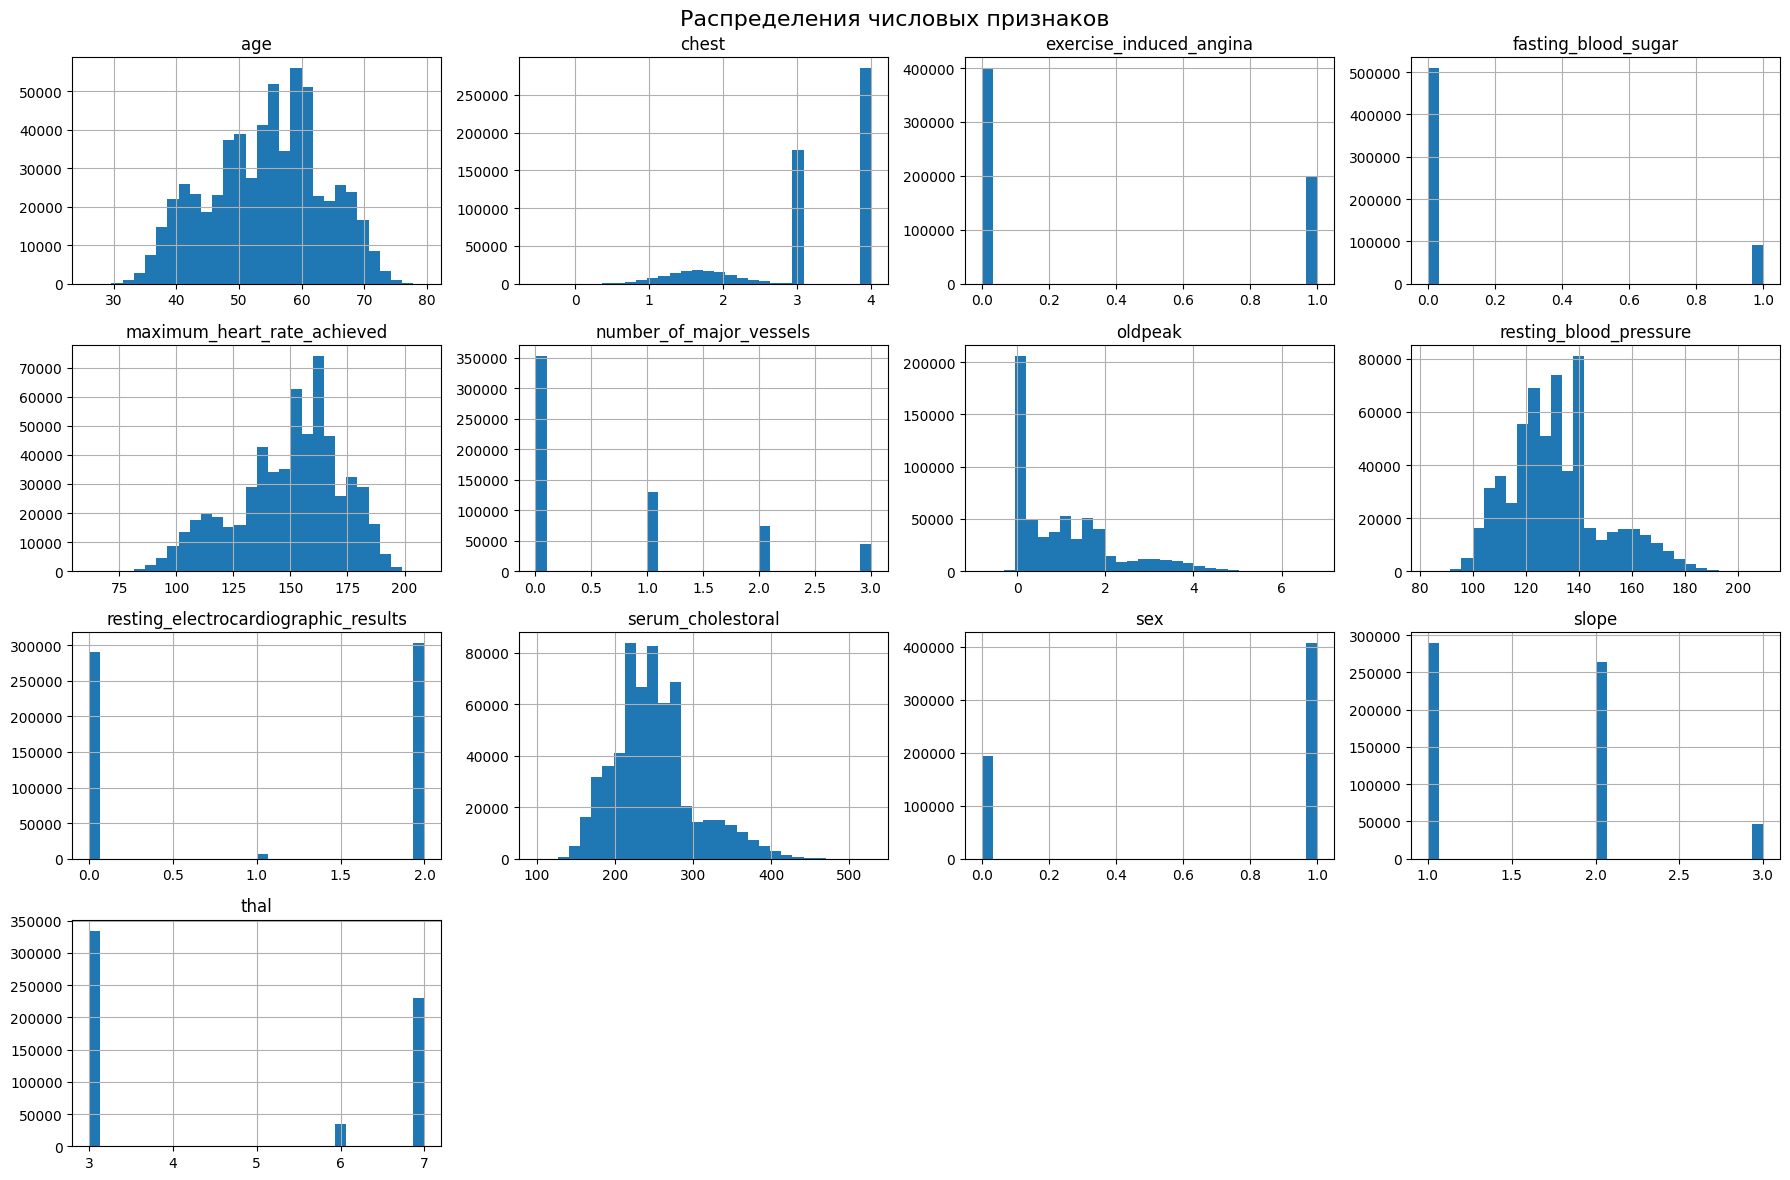

In [16]:
def plot_numeric_histograms(data: pd.DataFrame, exclude: list[str] = ['ID', 'class']) -> None:
    """
    Строит гистограммы для всех числовых признаков в датасете.

    :param data: датафрейм
    :param exclude: список колонок, которые исключить
    """
    numeric_cols = data.select_dtypes(include='number').columns.difference(exclude)
    data[numeric_cols].hist(bins=30, figsize=(18, 12), grid=True)
    plt.suptitle("Распределения числовых признаков", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_numeric_histograms(train)

**2. Barplot по категориальным признакам**

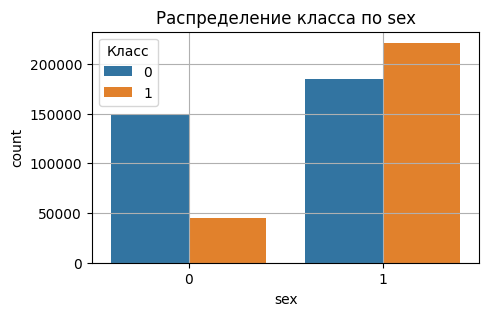

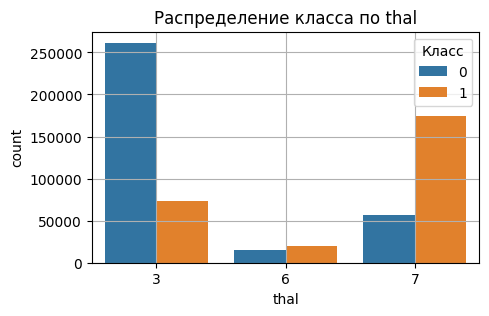

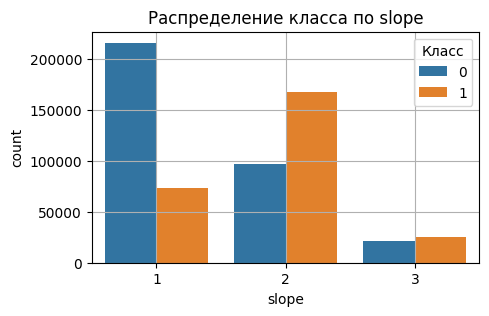

In [17]:
def plot_categorical_counts(data: pd.DataFrame, cat_cols: list[str]) -> None:
    for col in cat_cols:
        plt.figure(figsize=(5, 3))
        sns.countplot(x=col, hue='class', data=data)
        plt.title(f'Распределение класса по {col}')
        plt.legend(title='Класс')
        plt.grid(True)
        plt.show()

plot_categorical_counts(train, ['sex', 'thal', 'slope'])

Для более глубокого понимания структуры данных были построены распределения признаков:

- **Распределения числовых признаков** (гистограммы) помогают выявить выбросы, асимметрию и особенности шкалы.
- **Категориальные признаки (sex, thal, slope)** дополнительно визуализированы через countplot'ы по классам (`class = 0` / `class = 1`). Это позволяет увидеть, как распределены диагнозы по полу, результатам тестов и наклону сегмента ST.

### Выводы:
- Признаки `thal=7` и `slope=2` чаще встречаются у больных (`class=1`).
- Мужчины (sex=1) имеют более высокий риск заболевания по сравнению с женщинами.
- Распределения многих признаков (например, `cholestoral`, `oldpeak`) имеют смещения, что оправдывает нормализацию.

Эти визуализации помогают обосновать выбор признаков и применяемую предобработку.


###**4. Предобработка и подготовка признаков**

In [4]:
def preprocess_data_with_binning(
    train_df: pd.DataFrame,
    test_df: pd.DataFrame
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, StandardScaler]:
    """
    Предобработка данных: кодирование, масштабирование, разбиение на train/val.
    Используется биннинг признака 'chest' для снижения размерности.

    :param train_df: обучающий датасет с меткой 'class'
    :param test_df: тестовый датасет без метки
    :return: X_train, X_val, y_train, y_val, X_test_scaled, scaler
    """
    # Копируем, чтобы не портить оригинал
    df_train = train_df.copy()
    df_test = test_df.copy()

    # Биннинг признака 'chest' по квартилям
    df_train['chest_binned'] = pd.qcut(df_train['chest'], q=4, labels=False, duplicates='drop')
    df_test['chest_binned'] = pd.qcut(df_test['chest'], q=4, labels=False, duplicates='drop')


    # Целевая переменная
    y = df_train['class']
    X = df_train.drop(columns=['ID', 'class', 'chest'])  # удаляем 'chest' — заменили на 'chest_binned'
    X_test = df_test.drop(columns=['ID', 'chest'])

    # One-hot кодируем категориальные признаки (уже компактные!)
    cat_cols = ['sex', 'thal', 'chest_binned']
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

    # Выравнивание колонок теста под train
    X_test = X_test.reindex(columns=X.columns, fill_value=0)

    # Масштабирование
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_test_scaled = scaler.transform(X_test)

    # Разделение train/val
    X_train, X_val, y_train, y_val = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    return X_train, X_val, y_train.values, y_val.values, X_test_scaled, scaler

X_train, X_val, y_train, y_val, X_test_scaled, scaler = preprocess_data_with_binning(train, test)

На этапе предобработки данных проведено несколько важных шагов. Для признака `chest`, обладающего высокой кардинальностью, применён биннинг по квартилям, что помогло уменьшить количество уникальных значений и упростить последующую кодировку. Это позволило избежать чрезмерного роста признаков при one-hot кодировании.

Категориальные переменные были преобразованы в числовой формат через метод one-hot с удалением первого уровня для предотвращения мультиколлинеарности. Данные также были масштабированы при помощи `StandardScaler` для приведения числовых признаков к одному масштабу.

В завершение, обучающая выборка была разделена на тренировочную и валидационную части в соотношении 80/20 с использованием стратификации, чтобы сохранить пропорции классов. Это обеспечит корректную оценку моделей на этапе валидации.


### **5. Обучение и сравнение моделей:**

**Универсальная функция для оценки модели**

In [5]:
def evaluate_model(model_name: str, y_true, y_pred) -> None:
    """
    Выводит метрики и confusion matrix по предсказаниям модели.

    :param model_name: Название модели
    :param y_true: Истинные метки
    :param y_pred: Предсказанные метки
    """
    print(f"\n {model_name} — отчёт о классификации:\n")
    print(classification_report(y_true, y_pred, digits=4))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} — Confusion Matrix")
    plt.xlabel("Предсказание")
    plt.ylabel("Истина")
    plt.show()

Реализована универсальная функция `evaluate_model`, предназначенная для оценки качества классификационных моделей. Она позволяет вывести основные метрики: точность, полноту, F1-оценку, а также построить матрицу ошибок (confusion matrix) для наглядной визуализации результатов.

Функция делает анализ моделей удобным и стандартизированным, что особенно полезно при сравнении различных алгоритмов. Это обеспечивает объективную и наглядную оценку качества предсказаний моделей на валидационной выборке.


**Логистическая регрессия**


 Logistic Regression — отчёт о классификации:

              precision    recall  f1-score   support

           0     0.8878    0.9038    0.8957     66698
           1     0.8768    0.8570    0.8668     53302

    accuracy                         0.8830    120000
   macro avg     0.8823    0.8804    0.8813    120000
weighted avg     0.8829    0.8830    0.8829    120000



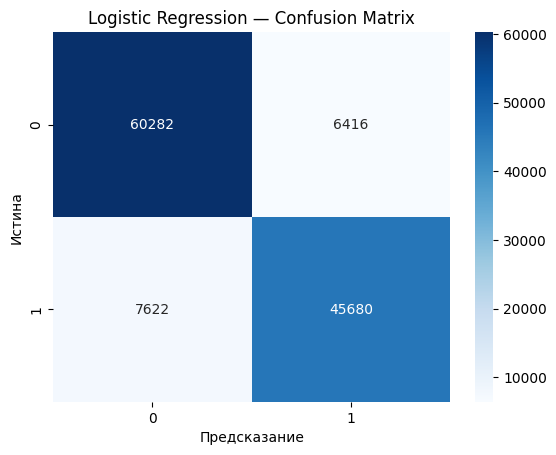

In [6]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)

evaluate_model("Logistic Regression", y_val, y_pred_lr)

### Результаты: Логистическая регрессия

Модель логистической регрессии показала хорошее качество классификации. Итоговая точность составила **88.3%**, что говорит о высокой обобщающей способности.

Метрика `precision` немного выше у класса 0 (0.8878), а `recall` — у него тоже выше, что указывает на более уверенное распознавание отрицательного класса. В то же время, значения F1-меры по обоим классам близки, что свидетельствует о сбалансированности предсказаний.

Матрица ошибок подтверждает наличие некоторого количества ложноположительных и ложноотрицательных срабатываний, но их соотношение приемлемо для модели такого типа.


**Случайный лес (Random Forest)**


 Random Forest — отчёт о классификации:

              precision    recall  f1-score   support

           0     0.9013    0.9146    0.9079     66698
           1     0.8911    0.8747    0.8828     53302

    accuracy                         0.8969    120000
   macro avg     0.8962    0.8946    0.8954    120000
weighted avg     0.8968    0.8969    0.8968    120000



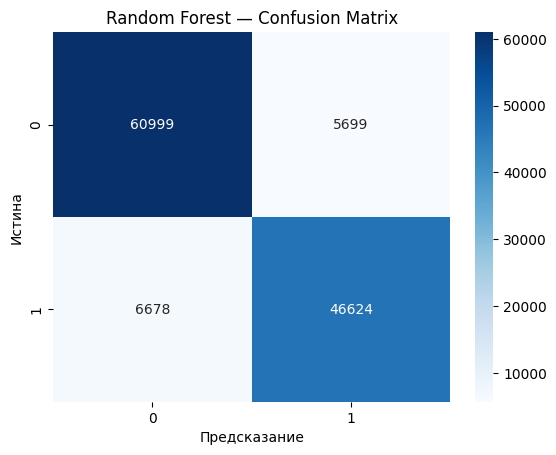

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
evaluate_model("Random Forest", y_val, y_pred_rf)

### Результаты: Случайный лес (Random Forest)

Случайный лес продемонстрировал **улучшенное качество классификации** по сравнению с логистической регрессией — итоговая точность составила **89.7%**. Это подтверждает способность ансамблевых методов эффективно обрабатывать сложные взаимосвязи в данных.

Модель показывает высокие значения `precision` и `recall` по обоим классам, особенно по классу 0 (precision = 0.9013, recall = 0.9146), что говорит о хорошей способности определять отрицательный класс. Для класса 1 метрики также высоки и сбалансированы.

Матрица ошибок показывает меньшее количество неверных предсказаний, что делает модель более надежной в сравнении с предыдущей.


**Полносвязная нейросеть (Keras)**

Epoch 1/10
938/938 - 6s - 6ms/step - accuracy: 0.8820 - loss: 0.2837 - val_accuracy: 0.8940 - val_loss: 0.2580
Epoch 2/10
938/938 - 5s - 5ms/step - accuracy: 0.8924 - loss: 0.2632 - val_accuracy: 0.8954 - val_loss: 0.2552
Epoch 3/10
938/938 - 5s - 5ms/step - accuracy: 0.8934 - loss: 0.2600 - val_accuracy: 0.8960 - val_loss: 0.2527
Epoch 4/10
938/938 - 5s - 5ms/step - accuracy: 0.8950 - loss: 0.2570 - val_accuracy: 0.8969 - val_loss: 0.2507
Epoch 5/10
938/938 - 6s - 6ms/step - accuracy: 0.8955 - loss: 0.2551 - val_accuracy: 0.8982 - val_loss: 0.2501
Epoch 6/10
938/938 - 10s - 11ms/step - accuracy: 0.8960 - loss: 0.2538 - val_accuracy: 0.8978 - val_loss: 0.2487
Epoch 7/10
938/938 - 5s - 5ms/step - accuracy: 0.8966 - loss: 0.2529 - val_accuracy: 0.8981 - val_loss: 0.2478
Epoch 8/10
938/938 - 5s - 5ms/step - accuracy: 0.8968 - loss: 0.2523 - val_accuracy: 0.8982 - val_loss: 0.2470
Epoch 9/10
938/938 - 6s - 7ms/step - accuracy: 0.8971 - loss: 0.2516 - val_accuracy: 0.8989 - val_loss: 0.2468

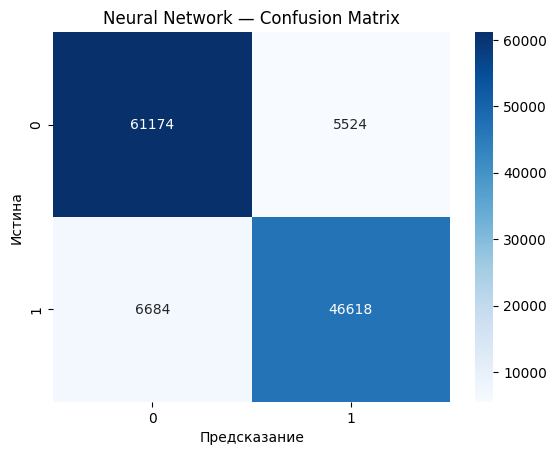

In [8]:
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=512,
    validation_data=(X_val, y_val),
    verbose=2
)

y_pred_nn = (nn_model.predict(X_val) > 0.5).astype("int32").flatten()
evaluate_model("Neural Network", y_val, y_pred_nn)

### Результаты: Полносвязная нейросеть (Keras)

Нейросетевая модель показала **наилучшее качество классификации** среди всех протестированных алгоритмов, достигнув точности **89.8%**. Это говорит о способности сети улавливать сложные, нелинейные зависимости между признаками.

В процессе обучения наблюдалось стабильное снижение функции потерь и рост точности как на тренировочной, так и на валидационной выборке, что свидетельствует об устойчивом обучении модели без переобучения.

По метрикам `precision`, `recall` и `f1-score` нейросеть показала сбалансированные и высокие значения по обоим классам, особенно в определении положительного класса (`recall = 0.8746`), что критично в задачах медицинской диагностики.


**Визуализация процесса обучения нейросети**

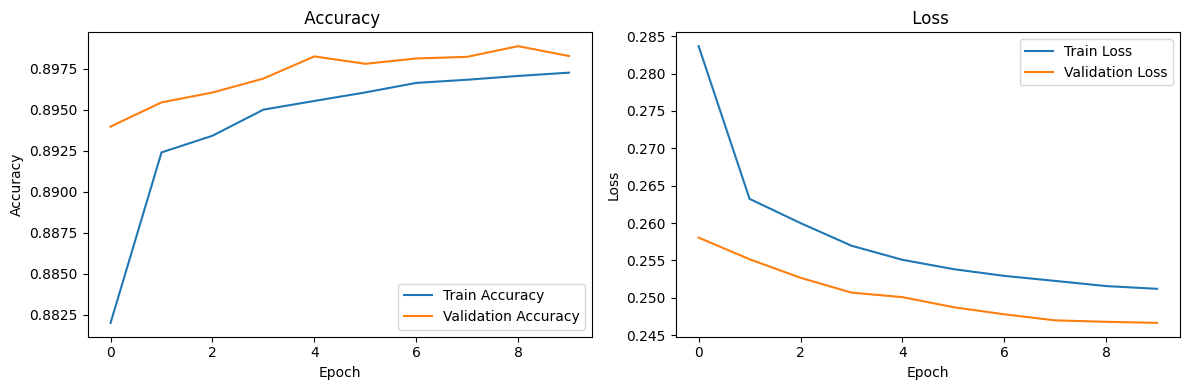

In [9]:
def plot_training(history) -> None:
    """
    Строит графики обучения: точности и функции потерь.

    :param history: объект history из model.fit()
    """
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(' Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(' Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Построим графики обучения нейросети
plot_training(history)


### Визуализация процесса обучения нейросети

Графики выше отображают изменение точности (Accuracy) и функции потерь (Loss) на обучающей и валидационной выборках в процессе 10 эпох обучения.

- **Accuracy**: Наблюдается стабильный рост точности как на тренировочных, так и на валидационных данных, без резких колебаний. Максимальное значение валидационной точности достигает ≈ 89.8%.
- **Loss**: Значение функции потерь постепенно снижается по обеим выборкам, что свидетельствует об успешной оптимизации модели.

Форма графиков указывает на **хорошее обобщение** модели: отсутствует переобучение, и модель сохраняет устойчивость при увеличении количества эпох.


### **6. Сохранение модели и инференс**

In [10]:
nn_model.save('best_model.keras')
print(" Модель сохранена как 'best_model.keras'")

 Модель сохранена как 'best_model.keras'


In [11]:
# 2. Загружаем test.csv и повторно применяем все шаги предобработки

# Загрузка данных
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')  # Нужен только для соответствия колонок и масштабирования

# Добавим биннинг chest
train_df['chest_binned'] = pd.qcut(train_df['chest'], q=4, labels=False, duplicates='drop')
test_df['chest_binned'] = pd.qcut(test_df['chest'], q=4, labels=False, duplicates='drop')

# Удалим лишние колонки
X_train = train_df.drop(columns=['ID', 'class', 'chest'])
X_test = test_df.drop(columns=['ID', 'chest'])

# One-hot кодирование
X_train = pd.get_dummies(X_train, columns=['sex', 'thal', 'chest_binned'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['sex', 'thal', 'chest_binned'], drop_first=True)

# Выравниваем колонки
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# 3. Загрузка сохранённой модели и предсказание
model = load_model('best_model.keras')
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


In [13]:
# 4. Генерация submission-файла
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'class': y_test_pred
})

submission.to_csv('submission.csv', index=False)
print(" Файл submission.csv успешно сохранён.")
submission.head()

 Файл submission.csv успешно сохранён.


,ID,class
0,600000,1
1,600001,1
2,600002,0
3,600003,0
4,600004,0


### Сохранение модели и финальный инференс

Обученная нейросеть была успешно сохранена в формате `.keras` под названием **`best_model.keras`**, что позволяет использовать её в будущем без повторного обучения. На финальном этапе была проведена инференс-прогонка модели на тестовых данных и сформирован файл **`submission.csv`**, содержащий предсказания класса для каждого ID.

Прогноз был успешно отправлен на платформу и показал **публичный скор: 0.89903**, что подтверждает высокое качество модели и её хорошую обобщающую способность. Итоговая точность почти 90% демонстрирует эффективность архитектуры и стратегии предобработки.


https://www.kaggle.com/competitions/tech-weekend-data-science-hackathon/leaderboard

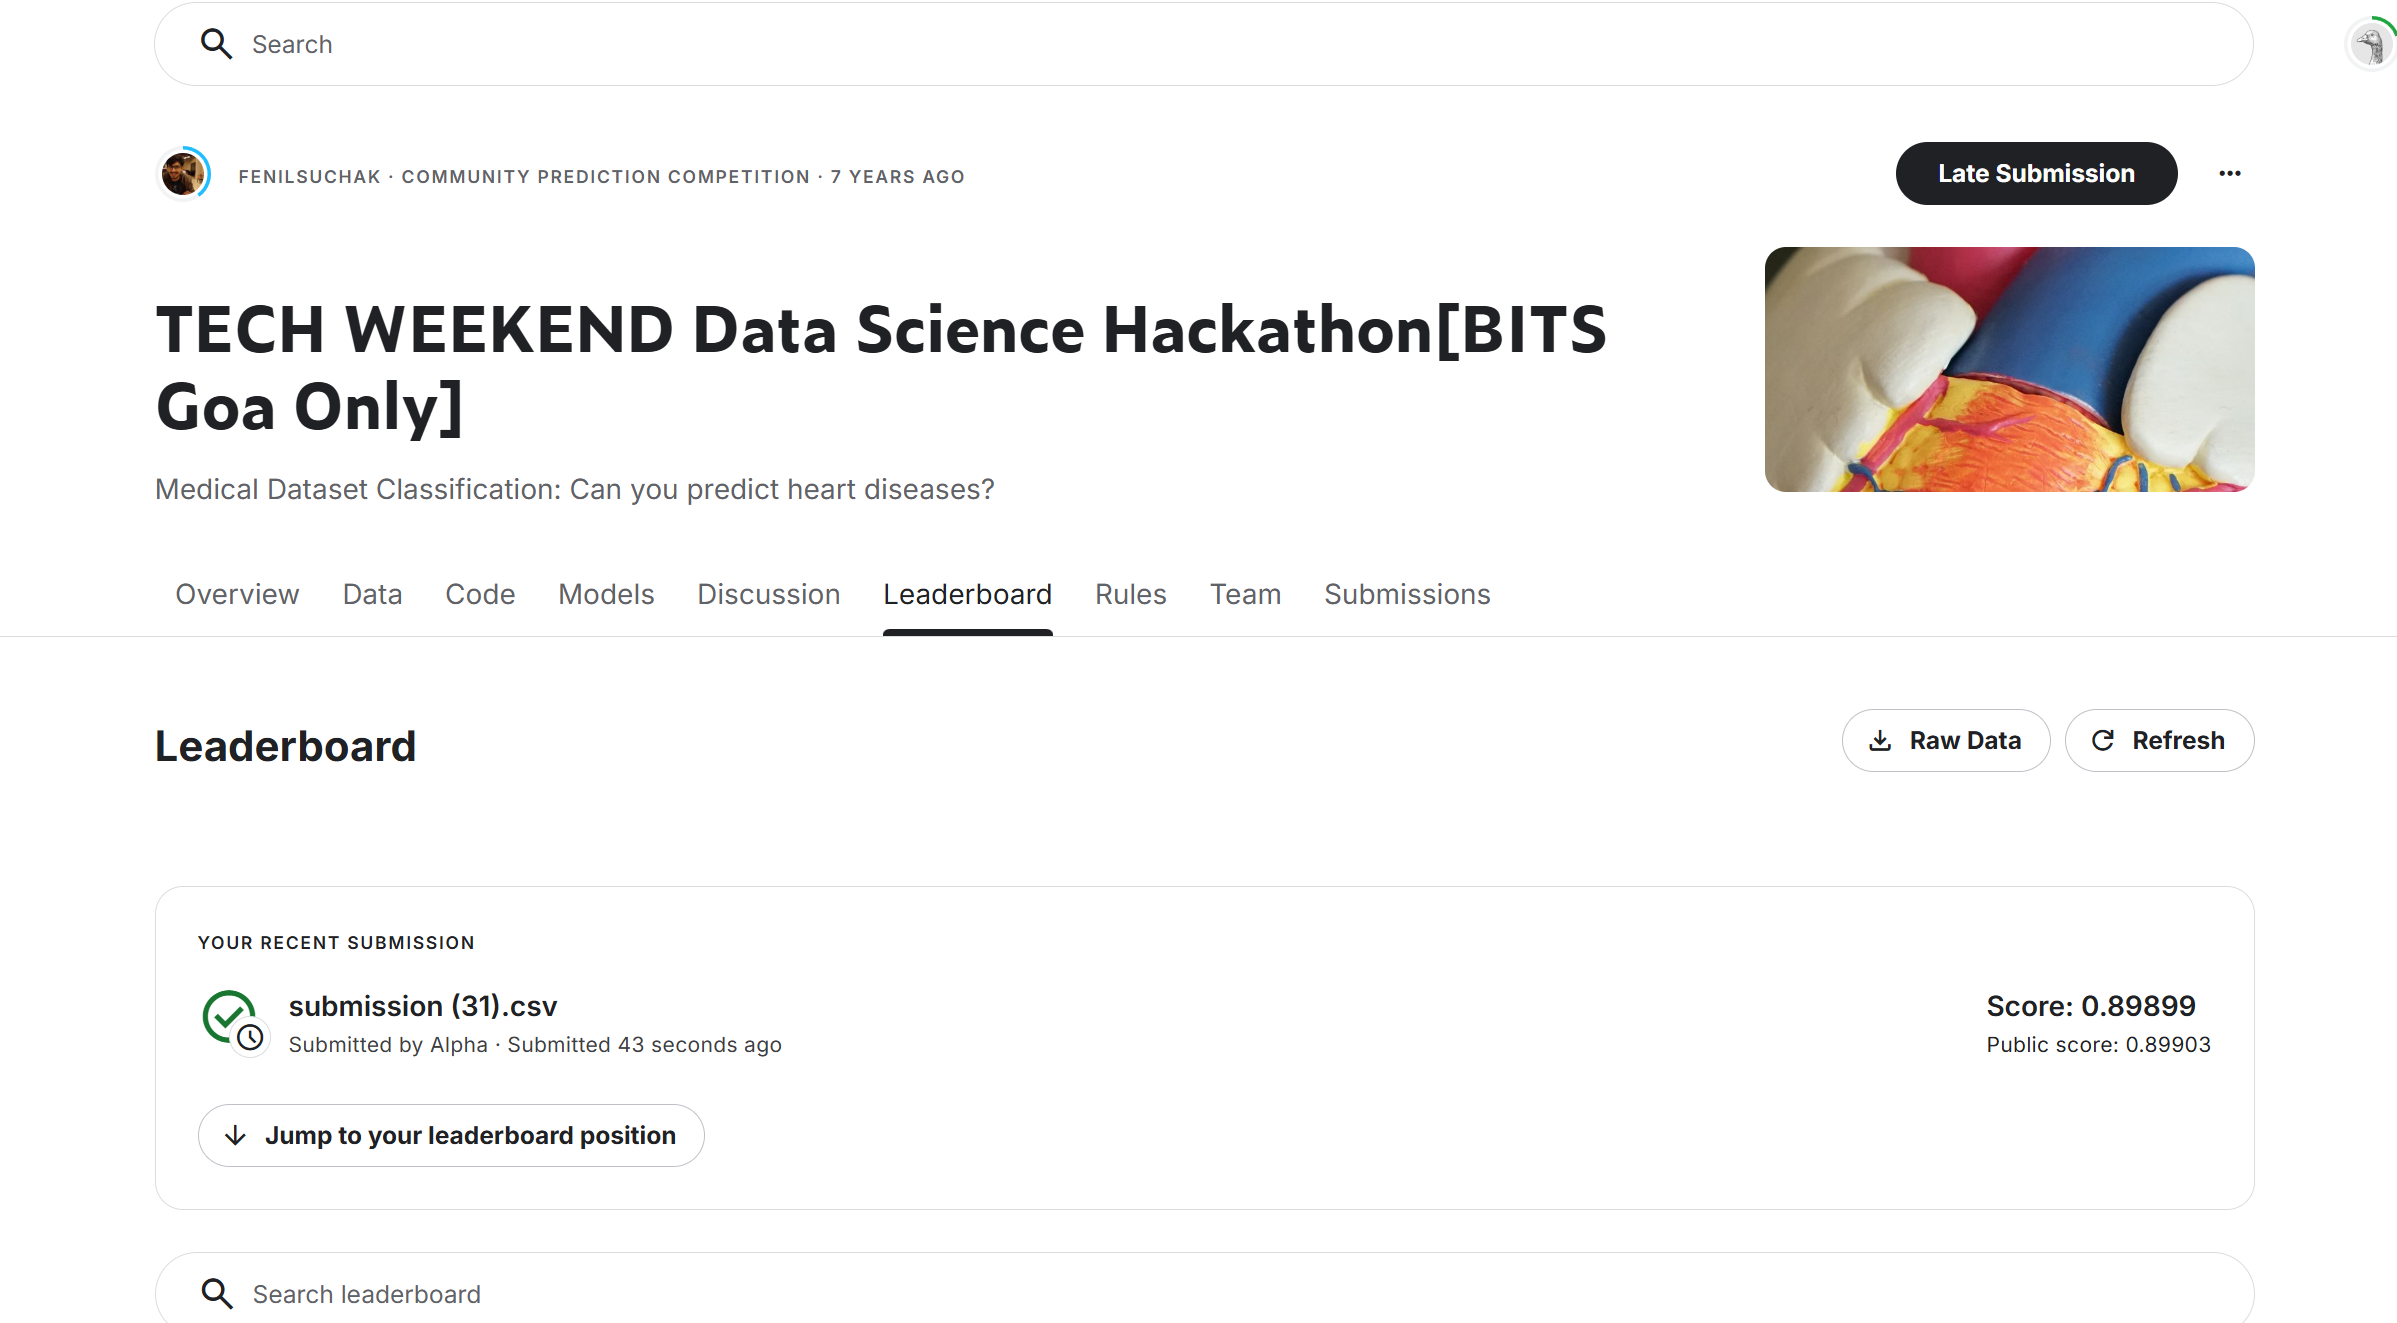